<a href="https://colab.research.google.com/github/sumitgaikwad8877/-Credit-Card-Default-Prediction-/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !pip install xlrd==1.2.0

In [4]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [6]:
#Data uploading
df = pd.read_excel('/content/drive/MyDrive/data/default of credit card clients.xls')

#Exploratory Data Analysis

In [7]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [8]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [9]:
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [10]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [12]:
df.shape

(30001, 25)

#Null values 

In [13]:
df.columns = df.iloc[0]
df.drop(labels= 0, axis = 0, inplace = True)

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.shape

(30000, 25)

In [16]:
df.rename(columns = {'default payment next month': 'defaulters'}, inplace = True)

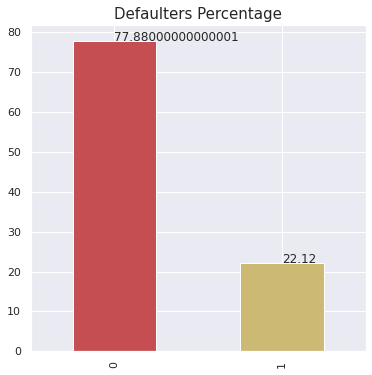

In [17]:
ax= df['defaulters'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('r','y'))

plt.title("Defaulters Percentage", fontsize=15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

 so we have 22.12% defaulters in our dataset and 77.88% persons are non defaulters

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


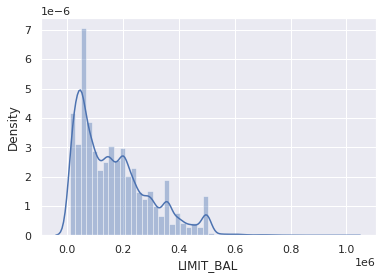

In [18]:
sns.distplot(df['LIMIT_BAL'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


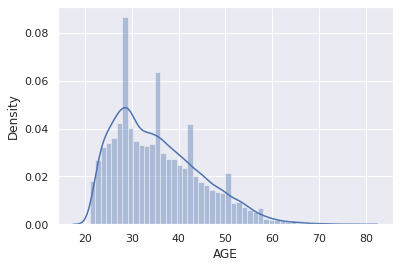

In [19]:
sns.distplot(df['AGE'])

 the data shows that most people are of age range 20-40 and a few only from 50-60 age group

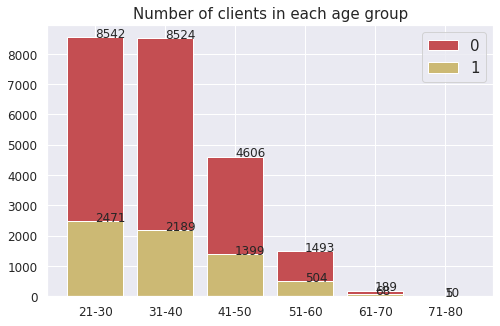

In [20]:
#  check the defaulters by age, sex, limit balance
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['defaulters'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['defaulters'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0', color = ('r'))
plt.bar(age_1.index, age_1.values, label='1', color = ('y'))
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()


 maximum clients from 21-30 age group followed by 31-40. 
Hence with increasing age group the number of clients that will default the payment next month is decreasing.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


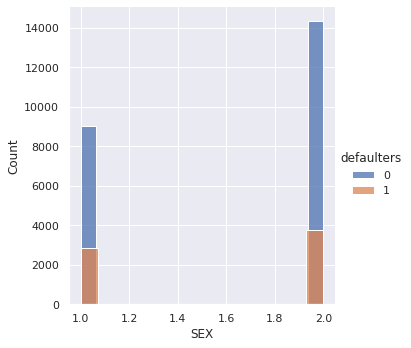

In [21]:
sns.FacetGrid(df, hue = 'defaulters', size = 5).map(sns.histplot, 'SEX').add_legend()

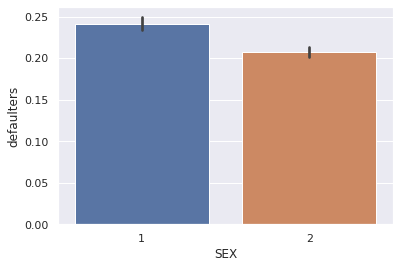

In [22]:
sns.barplot(x ='SEX', y ='defaulters', data = df)

So we have more male deafulters 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0.5, 1.0, 'Number of defaulters order by Sex')

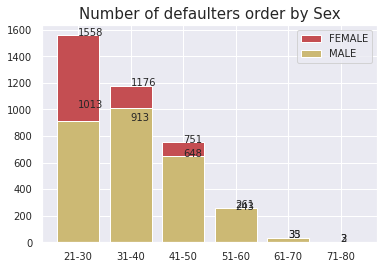

In [23]:
bins_sex = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']

sex_1 = df[df['SEX'] == 1][df['defaulters'] ==1]['AGE_BIN'].value_counts()
sex_2 = df[df['SEX'] == 2][df['defaulters'] ==1]['AGE_BIN'].value_counts()


plt.bar(sex_2.index, sex_2.values, label='FEMALE', color = ('r'))
plt.bar(sex_1.index, sex_1.values, label='MALE', color = ('y'))

for x,y in zip(names,sex_2):
    plt.text(x,y,y,fontsize=10)

for x,y in zip(names,sex_1):
    plt.text(x,y,y,fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize= 10)

plt.legend(loc='upper right', fontsize=10)
plt.title("Number of defaulters order by Sex", fontsize=15)


Number of defaulters order by Sex


* Regarding the attribute EDUCATION there are three categories not listed in the description of the dataset provided by the UCI website that corresponds to 0, 5, and 6.
* While for MARRIAGE we can notice the presence of category 0 that does not correspond to any categories previously described.

In [24]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [25]:
df['MARRIAGE'].replace(0,2, inplace = True)

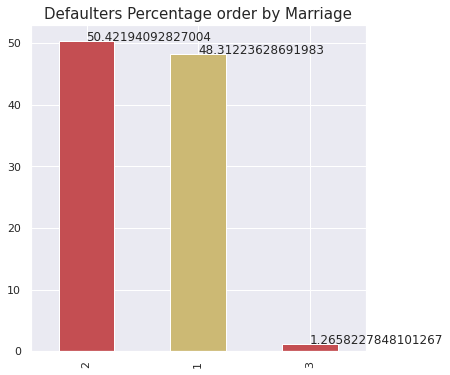

In [26]:
ax = df[df['defaulters'] == 1]['MARRIAGE'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('r','y'))

plt.title("Defaulters Percentage order by Marriage", fontsize=15)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

<Figure size 720x864 with 0 Axes>

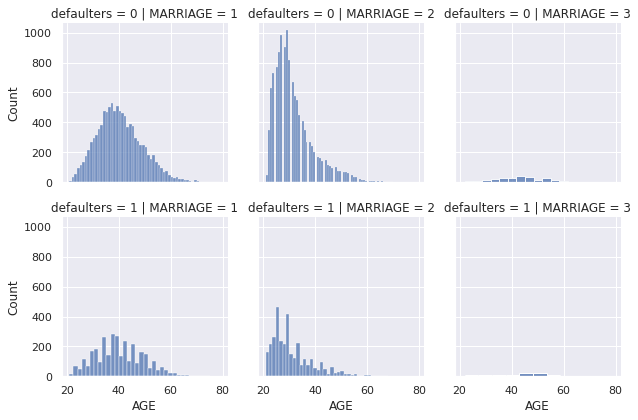

In [27]:
plt.figure(figsize=(10,12))
sns.FacetGrid(df, row='defaulters', col = 'MARRIAGE').map(sns.histplot, 'AGE')


 married people between the age of 30-45 have maximum chances of being defaulters, same for unmarried. So i think marriage is not the case, Age is. 

In [28]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [29]:
edu_condition =(df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 4)

In [30]:
df.loc[edu_condition, 'EDUCATION' ] = 3

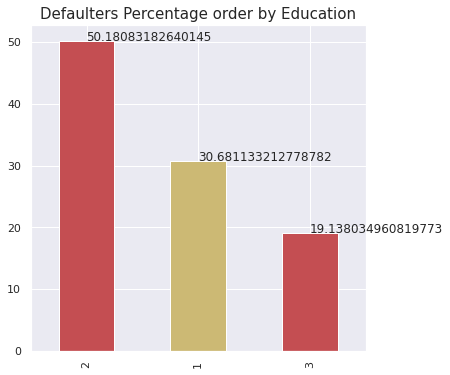

In [31]:
ax = df[df['defaulters'] == 1]['EDUCATION'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('r','y'))

plt.title("Defaulters Percentage order by Education", fontsize=15)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

  graduate and high school students

In [32]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000,30000,30000,30000,30000,30000
unique,11,11,11,11,10,10
top,0,0,0,0,0,0
freq,14737,15730,15764,16455,16947,16286


In [33]:
# Amount of given credit limit
df.LIMIT_BAL.describe()

count     30000
unique       81
top       50000
freq       3365
Name: LIMIT_BAL, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


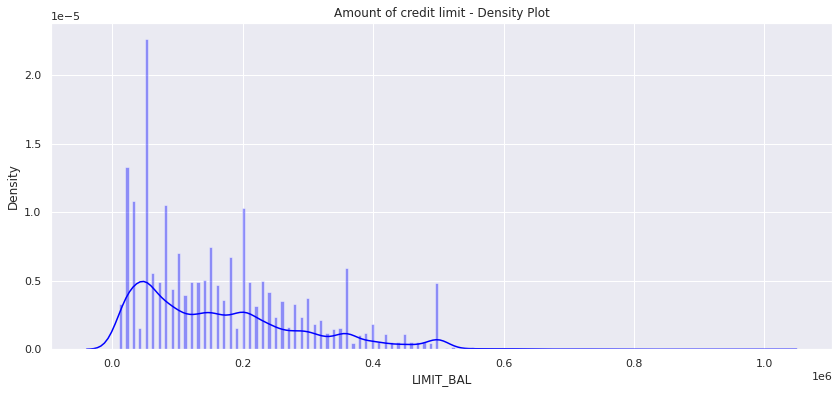

In [34]:
 plt.figure(figsize = (14,6))
 plt.title('Amount of credit limit - Density Plot')
 sns.set_color_codes("pastel")
 sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
 plt.show()

In [35]:
df['LIMIT_BAL'].value_counts().head(10)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
150000    1110
100000    1048
180000     995
360000     881
60000      825
Name: LIMIT_BAL, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


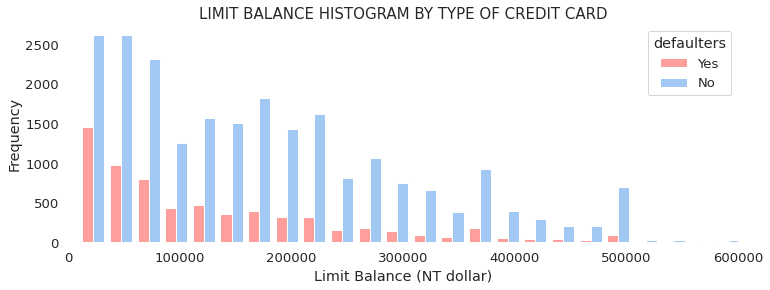

In [36]:
x1 = list(df[df['defaulters'] == 1]['LIMIT_BAL'])
x2 = list(df[df['defaulters'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['r', 'b'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'defaulters', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


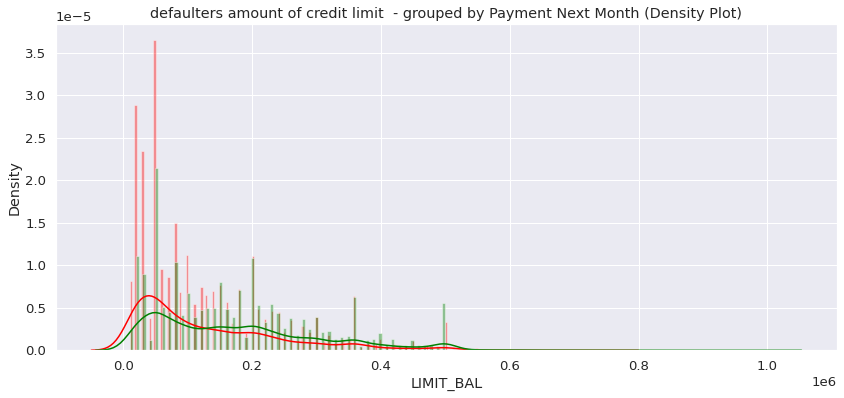

In [37]:
class_1 = df.loc[df['defaulters'] == 1]["LIMIT_BAL"]
class_0 = df.loc[df['defaulters'] == 0]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('defaulters amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.savefig('Fig - Density plot LIMIT_BAL grouped by label.png')

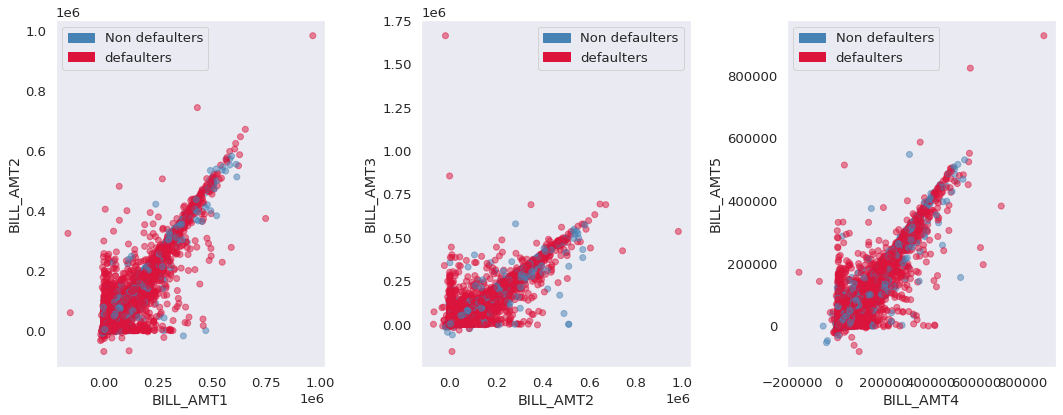

In [38]:
#distribution correlated features -- scatter interaction
import matplotlib.patches as mpatches


df_np=df.to_numpy()
target=df.defaulters

# variables to 
BILL_AMT1 = df['BILL_AMT1'].to_numpy()
BILL_AMT2 = df['BILL_AMT2'].to_numpy()
BILL_AMT3 = df['BILL_AMT3'].to_numpy()
BILL_AMT4 = df['BILL_AMT4'].to_numpy()
BILL_AMT5 = df['BILL_AMT5'].to_numpy()
BILL_AMT6 = df['BILL_AMT6'].to_numpy()
AGE = df['AGE'].to_numpy()
LIMIT_BAL = df['LIMIT_BAL'].to_numpy()
PAY_AMT1 = df['PAY_AMT1'].to_numpy()

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non defaulters","defaulters"]
pop_a = mpatches.Patch(color='steelblue', label='Non defaulters')
pop_b = mpatches.Patch(color='crimson', label='defaulters')
colors=['crimson', 'steelblue']
ax[0].scatter(BILL_AMT1, BILL_AMT2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('BILL_AMT1')
ax[0].set_ylabel('BILL_AMT2')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(BILL_AMT2, BILL_AMT3, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('BILL_AMT2')
ax[1].set_ylabel('BILL_AMT3')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(BILL_AMT4,BILL_AMT5, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('BILL_AMT4')
ax[2].set_ylabel('BILL_AMT5')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

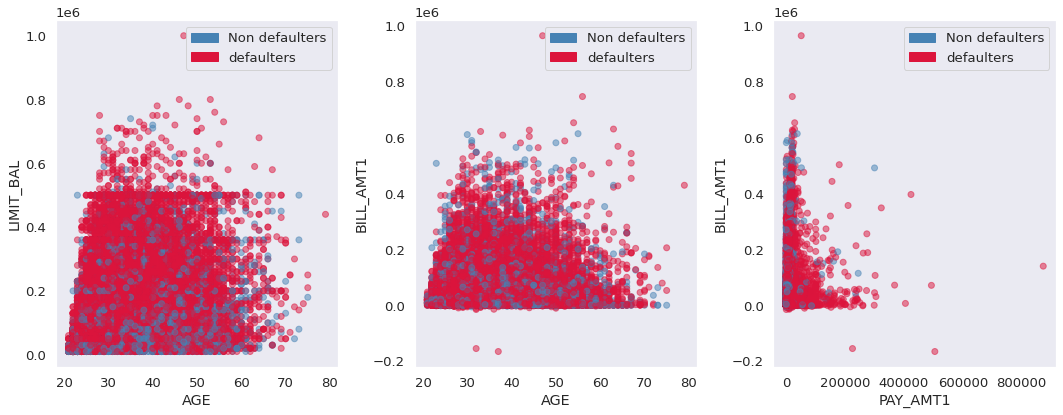

In [39]:
#distribution un-correlated features -- scatter interaction

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non defaulters","defaulters"]
pop_a = mpatches.Patch(color='steelblue', label='Non defaulters')
pop_b = mpatches.Patch(color='crimson', label='defaulters')
colors=['crimson', 'steelblue']

ax[0].scatter(AGE, LIMIT_BAL, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('AGE')
ax[0].set_ylabel('LIMIT_BAL')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(AGE, BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('AGE')
ax[1].set_ylabel('BILL_AMT1')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(PAY_AMT1,BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('PAY_AMT1')
ax[2].set_ylabel('BILL_AMT1')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

In [40]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters,AGE_BIN
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,21-30
2,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [41]:
df_final = df.drop(['AGE_BIN', 'ID'], axis = 1) 

In [42]:
df_final.LIMIT_BAL  = df_final.LIMIT_BAL.astype("int64")
df_final.AGE  = df_final.AGE.astype("int64")


In [43]:
df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [44]:
pd.get_dummies( columns= ['SEX', 'EDUCATION'], prefix = ['SEX', 'EDUCATION'], data = df_final, drop_first = True)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,1,0,1,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,1,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,1,0,1,0
4,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,1,0,1,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,20000,5003,3047,5000,1000,0,0,0,0,1
29997,150000,2,43,-1,-1,-1,-1,0,0,1683,...,3526,8998,129,0,0,0,0,0,0,1
29998,30000,2,37,4,3,2,-1,0,0,3565,...,0,22000,4200,2000,3100,1,0,0,1,0
29999,80000,1,41,1,-1,0,0,0,-1,-1645,...,3409,1178,1926,52964,1804,1,0,0,0,1


In [45]:
#df_final_2 = pd.get_dummies(df_final, drop_first= True)

# Classifiers

In [46]:
X = df_final.iloc[:, :-1]
Y = df_final['defaulters']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 24,stratify = Y )

In [48]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
9350,220000,2,1,2,36,-1,-1,-2,-2,-2,...,15064,101,1011,1411,125,15064,101,1011,1906,486
17538,180000,2,2,1,37,0,0,0,0,0,...,46325,47354,48323,49416,2000,1771,1800,1750,1893,2000
15070,400000,1,1,1,35,-2,-2,-2,-2,-2,...,98,44321,1699,0,2720,98,45869,1699,0,2024
20857,200000,1,2,1,38,0,0,0,-2,-2,...,212,2387,0,-2620,1005,220,2387,0,0,3380
2164,20000,1,1,2,30,0,0,2,0,0,...,19995,19391,19120,19158,6500,84,7171,1000,1000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27758,60000,2,2,2,23,0,0,0,0,0,...,54733,55618,56827,58040,5000,3000,1888,2000,2000,3000
11500,220000,1,1,1,33,-2,-1,-1,-2,-2,...,0,0,0,0,2500,0,0,0,0,0
16453,80000,2,3,1,55,0,0,0,0,0,...,43943,42913,43217,41662,5024,5014,5016,5017,5011,5014
3889,140000,2,3,1,50,0,0,0,0,0,...,140700,137365,137209,138934,6006,5000,5000,5120,5200,4800


In [49]:

y_train

9350     0
17538    0
15070    0
20857    0
2164     0
        ..
27758    1
11500    0
16453    0
3889     0
5744     0
Name: defaulters, Length: 24000, dtype: object

In [53]:
y_train = y_train.astype('int')

In [54]:
Y = Y.astype('int')


#Random Forest

In [55]:
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='roc_auc')

In [56]:
classifier.best_estimator_

RandomForestClassifier(max_depth=9)

In [57]:
classifier.best_params_

{'max_depth': 9, 'n_estimators': 100}

 #Testing Accuracy 

In [58]:
pred = classifier.predict(x_test)

In [59]:
y_test = y_test.astype('int')

In [60]:
accuracy_score(y_test,pred)

0.8188333333333333

In [61]:
classifier.predict_proba(x_test)

array([[0.90796437, 0.09203563],
       [0.8364007 , 0.1635993 ],
       [0.39963291, 0.60036709],
       ...,
       [0.78205024, 0.21794976],
       [0.88332981, 0.11667019],
       [0.88455507, 0.11544493]])

In [62]:
roc_auc_score(y_test,pred)

0.6600359034753835

In [63]:
print(classification_report(pred, y_test))
print(confusion_matrix( y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5244
           1       0.38      0.66      0.48       756

    accuracy                           0.82      6000
   macro avg       0.66      0.75      0.68      6000
weighted avg       0.87      0.82      0.84      6000

[[4415  258]
 [ 829  498]]


In [64]:
recall_score(y_test, pred)

0.3752825923134891

recall is 38%


In [65]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state= seed,shuffle=True)
model = KNeighborsClassifier()


In [66]:
results = cross_val_score(model, X, Y, cv=kfold)
print("Mean Estimated KNeighbors: %f " % (results.mean()))

Mean Estimated KNeighbors: 0.753733 


In [67]:
neighbors = np.arange(1,9)
Train_accuracy = np.empty(len(neighbors))
Test_accuracy = np.empty(len(neighbors))

for i, K in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = K)
  knn.fit(x_train,y_train)
  Train_accuracy[i] = knn.score(x_train,y_train)
  Test_accuracy[i] = knn.score(x_test,y_test)



In [68]:
Train_accuracy

array([0.99941667, 0.842125  , 0.84191667, 0.81529167, 0.8155    ,
       0.802625  , 0.80525   , 0.79716667])

In [69]:
Test_accuracy

array([0.6915    , 0.76866667, 0.74116667, 0.77133333, 0.75583333,
       0.77166667, 0.76516667, 0.77433333])

In [70]:
classifier_knn = KNeighborsClassifier()
grid_values_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
classifier_knn = RandomizedSearchCV(classifier_knn, param_distributions = grid_values_knn, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_knn.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   scoring='roc_auc')

In [71]:
classifier_knn.best_params_

{'n_neighbors': 11}

In [72]:
x_test.isna().sum()

0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [73]:
pred_knn = classifier_knn.predict(x_test)

In [74]:
print("Accuracy score %s" %accuracy_score(y_test,pred_knn))
#print("F1 score %s" %f1_score(y_test,pred_knn))
print("Classification report  \n %s" %(classification_report(y_test, pred_knn)))

Accuracy score 0.7713333333333333
Classification report  
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      4673
           1       0.45      0.14      0.22      1327

    accuracy                           0.77      6000
   macro avg       0.62      0.55      0.54      6000
weighted avg       0.72      0.77      0.72      6000



In [75]:
print(confusion_matrix( y_test, pred_knn))

[[4436  237]
 [1135  192]]


In [76]:
roc_auc_score(y_test,pred_knn)

0.5469851901389292

In [77]:
recall_score(y_test,pred_knn)

0.14468726450640543

the dataset ,KNN is given a better accuracy

# Implementing SMOT
increasing the number of cases in your dataset 

In [78]:
X.shape

(30000, 23)

In [79]:
Y.shape

(30000,)

In [80]:
Y.value_counts()

0    23364
1     6636
Name: defaulters, dtype: int64

In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, Y_sm = smote.fit_resample(X, Y)
# summarize the new class distribution
counter = Counter(Y_sm)

In [82]:
counter

Counter({1: 23364, 0: 23364})

In [83]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,Y_sm, test_size = 0.2, random_state = 24,stratify = Y_sm)

## Random Forest with SMOT

In [84]:
classifier_sm = RandomForestClassifier() 
grid_values_sm = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
classifier = GridSearchCV(classifier, param_grid = grid_values_sm, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier_sm.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [85]:
pred_sm = classifier_sm.predict(x_test_sm)

In [86]:
roc_auc_score(y_test_sm,pred_sm)

0.8742777658891504

In [87]:
accuracy_score(y_test_sm,pred_sm)

0.8742777658891504

In [88]:
confusion_matrix(y_test_sm,pred_sm)

array([[4295,  378],
       [ 797, 3876]])

In [89]:
recall_score(y_test_sm,pred_sm)

0.8294457521934517

## KNN with SMOT

In [90]:
# Fit the object to train dataset
classifier_knn.fit(x_train_sm, y_train_sm)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11]},
                   scoring='roc_auc')

In [91]:
pred_knn_sm = classifier_knn.predict(x_test_sm)

In [92]:
classifier_knn.best_params_

{'n_neighbors': 2}

In [93]:
roc_auc_score(y_test_sm,pred_knn_sm)

0.7986304301305371

In [94]:
accuracy_score(y_test_sm,pred_knn_sm)

0.7986304301305371

In [95]:
confusion_matrix(y_test_sm,pred_knn_sm)

array([[3714,  959],
       [ 923, 3750]])

In [96]:
recall_score(y_test_sm,pred_knn_sm)

0.8024823453884015

# #XGBoost

In [97]:
x_train['SEX'] = x_train['SEX'].astype('int') 
x_train['EDUCATION'] = x_train['EDUCATION'].astype('int') 
x_train['PAY_0'] = x_train['PAY_0'].astype('int') 
x_train['PAY_2'] = x_train['PAY_2'].astype('int') 
x_train['PAY_3'] = x_train['PAY_3'].astype('int') 
x_train['PAY_4'] = x_train['PAY_4'].astype('int') 
x_train['PAY_5'] = x_train['PAY_5'].astype('int') 
x_train['PAY_6'] = x_train['PAY_6'].astype('int') 
x_train['BILL_AMT1'] = x_train['BILL_AMT1'].astype('int') 
x_train['BILL_AMT2'] = x_train['BILL_AMT2'].astype('int') 
x_train['BILL_AMT3'] = x_train['BILL_AMT3'].astype('int') 
x_train['BILL_AMT4'] = x_train['BILL_AMT4'].astype('int') 
x_train['BILL_AMT5'] = x_train['BILL_AMT5'].astype('int') 
x_train['BILL_AMT6'] = x_train['BILL_AMT6'].astype('int') 
x_train['PAY_AMT1'] = x_train['PAY_AMT1'].astype('int') 
x_train['PAY_AMT2'] = x_train['PAY_AMT2'].astype('int') 
x_train['PAY_AMT3'] = x_train['PAY_AMT3'].astype('int') 
x_train['PAY_AMT4'] = x_train['PAY_AMT4'].astype('int') 
x_train['PAY_AMT5'] = x_train['PAY_AMT5'].astype('int') 
x_train['PAY_AMT6'] = x_train['PAY_AMT6'].astype('int') 

In [98]:
x_test['SEX'] = x_test['SEX'].astype('int') 
x_test['EDUCATION'] = x_test['EDUCATION'].astype('int') 
x_test['PAY_0'] = x_test['PAY_0'].astype('int') 
x_test['PAY_2'] = x_test['PAY_2'].astype('int') 
x_test['PAY_3'] = x_test['PAY_3'].astype('int') 
x_test['PAY_4'] = x_test['PAY_4'].astype('int') 
x_test['PAY_5'] = x_test['PAY_5'].astype('int') 
x_test['PAY_6'] = x_test['PAY_6'].astype('int') 
x_test['BILL_AMT1'] = x_test['BILL_AMT1'].astype('int') 
x_test['BILL_AMT2'] = x_test['BILL_AMT2'].astype('int') 
x_test['BILL_AMT3'] = x_test['BILL_AMT3'].astype('int') 
x_test['BILL_AMT4'] = x_test['BILL_AMT4'].astype('int') 
x_test['BILL_AMT5'] = x_test['BILL_AMT5'].astype('int') 
x_test['BILL_AMT6'] = x_test['BILL_AMT6'].astype('int') 
x_test['PAY_AMT1'] = x_test['PAY_AMT1'].astype('int') 
x_test['PAY_AMT2'] = x_test['PAY_AMT2'].astype('int') 
x_test['PAY_AMT3'] = x_test['PAY_AMT3'].astype('int') 
x_test['PAY_AMT4'] = x_test['PAY_AMT4'].astype('int') 
x_test['PAY_AMT5'] = x_test['PAY_AMT5'].astype('int') 
x_test['PAY_AMT6'] = x_test['PAY_AMT6'].astype('int') 

In [99]:
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier()

In [100]:
xgb_pred = xgb.predict(x_test)

In [101]:
roc_auc_score(y_test,xgb_pred)

0.659552116078013

In [102]:
recall_score(y_test,xgb_pred)

0.37452901281085155

## XGboost with smote

In [103]:
x_train_sm['SEX'] = x_train_sm['SEX'].astype('int') 
x_train_sm['EDUCATION'] = x_train_sm['EDUCATION'].astype('int') 
x_train_sm['PAY_0'] = x_train_sm['PAY_0'].astype('int') 
x_train_sm['PAY_2'] = x_train_sm['PAY_2'].astype('int') 
x_train_sm['PAY_3'] = x_train_sm['PAY_3'].astype('int') 
x_train_sm['PAY_4'] = x_train_sm['PAY_4'].astype('int') 
x_train_sm['PAY_5'] = x_train_sm['PAY_5'].astype('int') 
x_train_sm['PAY_6'] = x_train_sm['PAY_6'].astype('int') 
x_train_sm['BILL_AMT1'] = x_train_sm['BILL_AMT1'].astype('int') 
x_train_sm['BILL_AMT2'] = x_train_sm['BILL_AMT2'].astype('int') 
x_train_sm['BILL_AMT3'] = x_train_sm['BILL_AMT3'].astype('int') 
x_train_sm['BILL_AMT4'] = x_train_sm['BILL_AMT4'].astype('int') 
x_train_sm['BILL_AMT5'] = x_train_sm['BILL_AMT5'].astype('int') 
x_train_sm['BILL_AMT6'] = x_train_sm['BILL_AMT6'].astype('int') 
x_train_sm['PAY_AMT1'] = x_train_sm['PAY_AMT1'].astype('int') 
x_train_sm['PAY_AMT2'] = x_train_sm['PAY_AMT2'].astype('int') 
x_train_sm['PAY_AMT3'] = x_train_sm['PAY_AMT3'].astype('int') 
x_train_sm['PAY_AMT4'] = x_train_sm['PAY_AMT4'].astype('int') 
x_train_sm['PAY_AMT5'] = x_train_sm['PAY_AMT5'].astype('int') 
x_train_sm['PAY_AMT6'] = x_train_sm['PAY_AMT6'].astype('int') 

In [104]:
x_test_sm['SEX'] = x_test_sm['SEX'].astype('int') 
x_test_sm['EDUCATION'] = x_test_sm['EDUCATION'].astype('int') 
x_test_sm['PAY_0'] = x_test_sm['PAY_0'].astype('int') 
x_test_sm['PAY_2'] = x_test_sm['PAY_2'].astype('int') 
x_test_sm['PAY_3'] = x_test_sm['PAY_3'].astype('int') 
x_test_sm['PAY_4'] = x_test_sm['PAY_4'].astype('int') 
x_test_sm['PAY_5'] = x_test_sm['PAY_5'].astype('int') 
x_test_sm['PAY_6'] = x_test_sm['PAY_6'].astype('int') 
x_test_sm['BILL_AMT1'] = x_test_sm['BILL_AMT1'].astype('int') 
x_test_sm['BILL_AMT2'] = x_test_sm['BILL_AMT2'].astype('int') 
x_test_sm['BILL_AMT3'] = x_test_sm['BILL_AMT3'].astype('int') 
x_test_sm['BILL_AMT4'] = x_test_sm['BILL_AMT4'].astype('int') 
x_test_sm['BILL_AMT5'] = x_test_sm['BILL_AMT5'].astype('int') 
x_test_sm['BILL_AMT6'] = x_test_sm['BILL_AMT6'].astype('int') 
x_test_sm['PAY_AMT1'] = x_test_sm['PAY_AMT1'].astype('int') 
x_test_sm['PAY_AMT2'] = x_test_sm['PAY_AMT2'].astype('int') 
x_test_sm['PAY_AMT3'] = x_test_sm['PAY_AMT3'].astype('int') 
x_test_sm['PAY_AMT4'] = x_test_sm['PAY_AMT4'].astype('int') 
x_test_sm['PAY_AMT5'] = x_test_sm['PAY_AMT5'].astype('int') 
x_test_sm['PAY_AMT6'] = x_test_sm['PAY_AMT6'].astype('int') 

In [116]:
xgb_sm = XGBClassifier()

xgb_sm.fit(x_train_sm,y_train_sm)

XGBClassifier()

In [106]:
xgb_pred_sm = xgb_sm.predict(x_test_sm)

In [107]:
xgb_pred_sm = xgb_sm.predict(x_test_sm)

In [108]:
roc_auc_score(y_test_sm,xgb_pred_sm)

0.7716670233254868

#  Performance Improvement :ENSEMBLES Voting


In [109]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [112]:

seed = 7
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

In [113]:
# ADA Boost model
model = AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy ADA Boost: %f " % (results.mean()))


Accuracy ADA Boost: 0.816933 


In [114]:
# Gradient Boosting model
model =GradientBoostingClassifier(n_estimators=num_trees,random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy Gradinet Boost: %f " % (results.mean()))


Accuracy Gradinet Boost: 0.820667 


In [117]:
# voting Ensemble for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier




In [118]:

seed = 7
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

In [119]:
# bagged Decision Tress model
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators= num_trees,random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy Bagged Decision Trees: %f" % (results.mean()))

Accuracy Bagged Decision Trees: 0.815600


In [120]:
# Random forest model
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy Random Forest: %f " % (results.mean()))

Accuracy Random Forest: 0.815900 


In [121]:
# Extra Trees Model
model =ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy Extre Trees: %f " % (results.mean()))


Accuracy Extre Trees: 0.812233 
